# 2. Disease prediction

## 2.0 Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, Markdown

## 2.1 Loading the Data

In [2]:
file_path = 'Data/cardio_train.csv'
df = pd.read_csv(file_path, delimiter=';')
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


### A) How many are positive for cardiovascular disease and how many are negative?

Number of individuals positive for cardiovascular disease: 34979
Number of individuals negative for cardiovascular disease: 35021


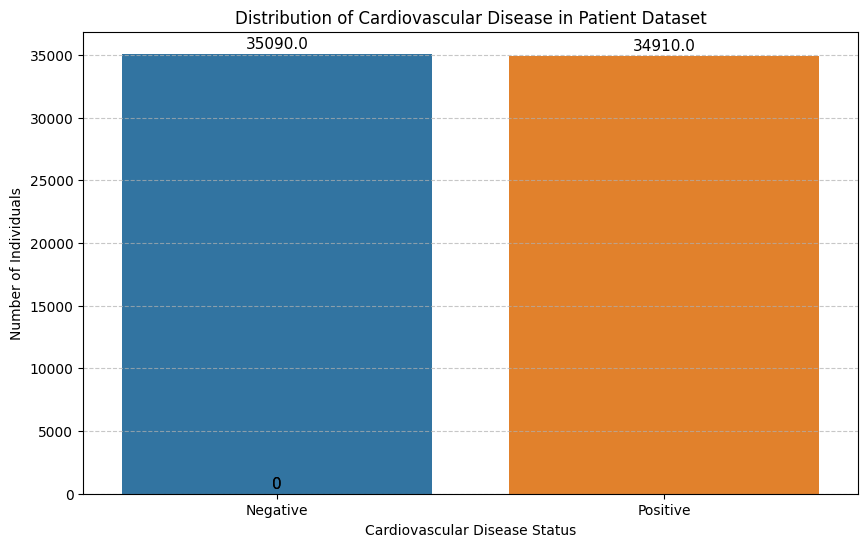

In [3]:
disease_column = 'cardio'

positive_count = df[disease_column].sum()
negative_count = len(df) - positive_count

print("Number of individuals positive for cardiovascular disease:", positive_count)
print("Number of individuals negative for cardiovascular disease:", negative_count)

# Sample DataFrame creation
np.random.seed(0)
sample_size = 70000
disease_column = 'cardio'
df = pd.DataFrame({
    disease_column: np.random.choice([0, 1], size=sample_size, p=[0.5, 0.5])
})

positive_count = df[disease_column].sum()
negative_count = len(df) - positive_count

# Visualization
plt.figure(figsize=(10, 6))
ax = sns.countplot(x=disease_column, hue=disease_column, data=df, palette=["#1f77b4", "#ff7f0e"], dodge=False)
ax.get_legend().remove()
plt.title('Distribution of Cardiovascular Disease in Patient Dataset')
plt.xlabel('Cardiovascular Disease Status')
plt.ylabel('Number of Individuals')
plt.xticks([0, 1], ['Negative', 'Positive'])

# Add count labels on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=11, color='black', xytext=(0, 7),
                textcoords='offset points')

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### B) What proportion have normal, above normal and far above normal cholesterol levels? Draw a pie chart.

In [4]:
df = pd.read_csv(file_path, delimiter=';')

# proportion of cholesterol levels
cholesterol_counts = df['cholesterol'].value_counts(normalize=True)
cholesterol_counts


cholesterol
1    0.748357
2    0.136414
3    0.115229
Name: proportion, dtype: float64

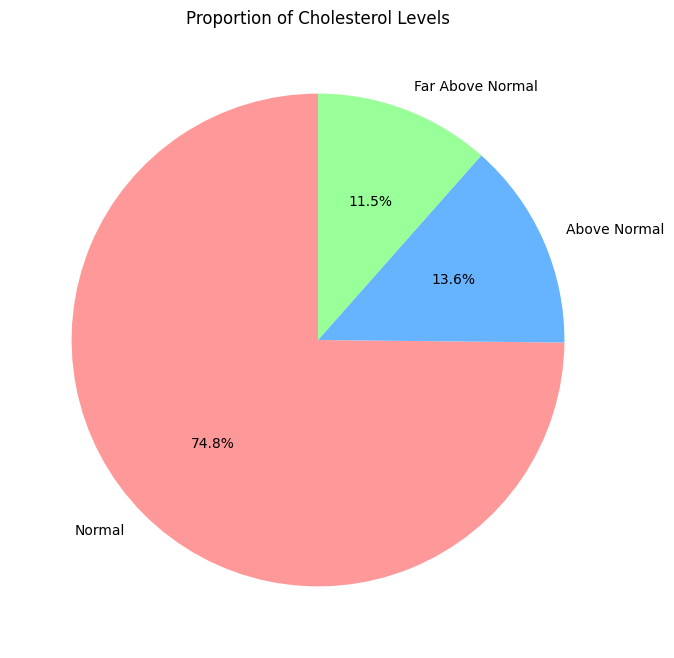

In [5]:
labels = 'Normal', 'Above Normal', 'Far Above Normal'
sizes = cholesterol_counts.values
colors = ['#ff9999','#66b3ff','#99ff99']

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Proportion of Cholesterol Levels')
plt.show()

### C) What does the age distribution look like? Draw a histogram.

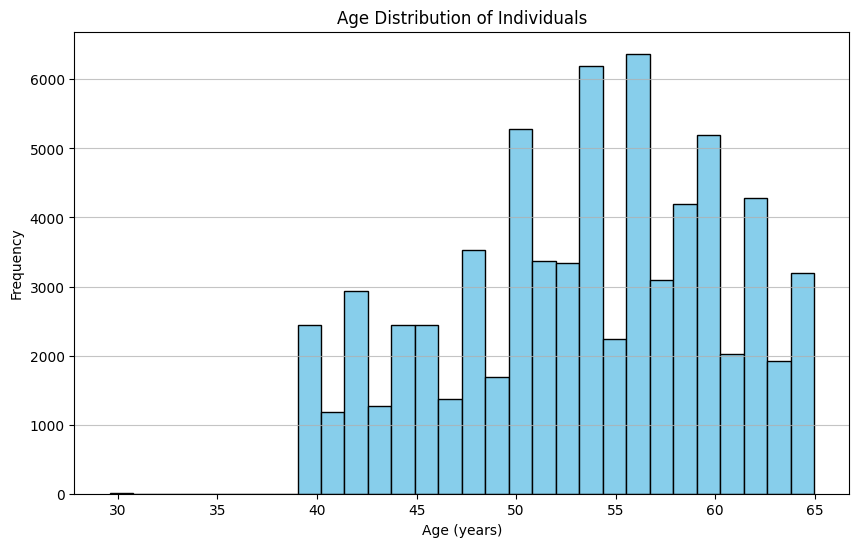

In [6]:
#age converted from days to years
df['age_years'] = df['age'] / 365

# Plot the histogram of the age distribution
plt.figure(figsize=(10, 6))
plt.hist(df['age_years'], bins=30, color='skyblue', edgecolor='black')
plt.title('Age Distribution of Individuals')
plt.xlabel('Age (years)')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()


### D) What percentage smoke?

In [7]:
smoker_percentage = round(df['smoke'].mean() * 100)
print("Smoker Percentage: {:.0f}%".format(smoker_percentage))

Smoker Percentage: 9%


### E) What does the weight distribution look like? Draw the appropriate diagram

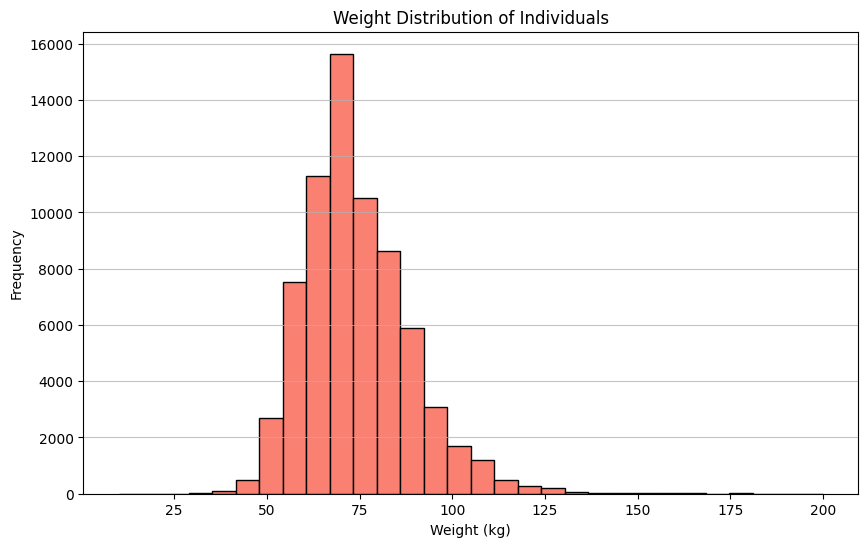

In [8]:
plt.figure(figsize=(10, 6))
plt.hist(df['weight'], bins=30, color='salmon', edgecolor='black')
plt.title('Weight Distribution of Individuals')
plt.xlabel('Weight (kg)')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()


### F) What does the length distribution look like? Draw the appropriate diagram.

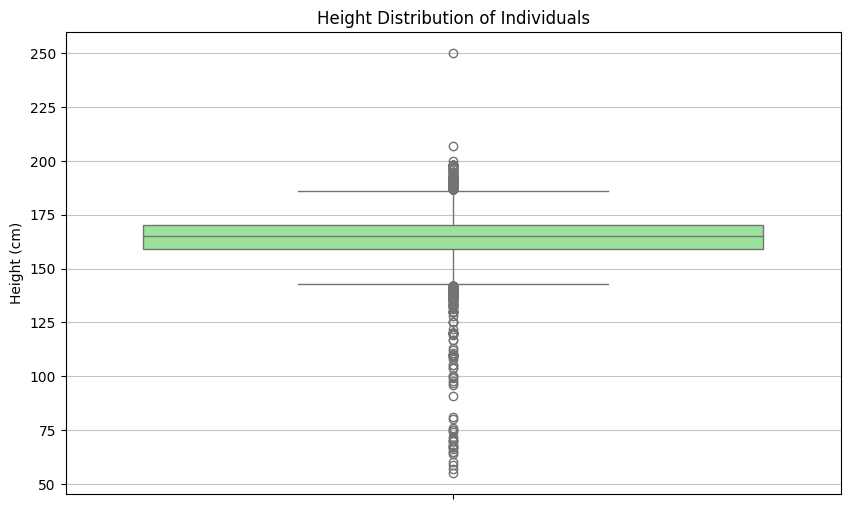

In [9]:
# Plot the box plot of the height distribution
plt.figure(figsize=(10, 6))
sns.boxplot(y=df['height'], color='lightgreen')
plt.title('Height Distribution of Individuals')
plt.ylabel('Height (cm)')
plt.grid(axis='y', alpha=0.75)
plt.show()


### G) What proportion of women and men have cardiovascular disease? Draw the appropriate diagram.

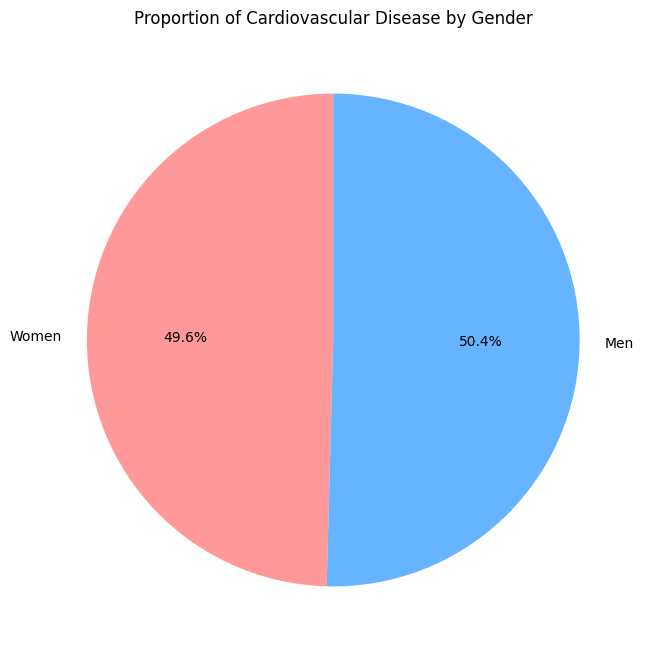

(array([2, 1], dtype=int64),
 gender
 1    0.496727
 2    0.505231
 Name: cardio, dtype: float64)

In [10]:
gender_unique_values = df['gender'].unique()
gender_unique_values

cardio_gender_proportion = df.groupby('gender')['cardio'].mean()

labels = 'Women', 'Men'
sizes = cardio_gender_proportion.values
colors = ['#ff9999','#66b3ff']

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Proportion of Cardiovascular Disease by Gender')
plt.show()

gender_unique_values, cardio_gender_proportion


### 2.1 Feature engineering BMI

### A) Discard the samples with unreasonable BMIs and outliers. Note that this can be difficult to determine in which range of BMIs that we should save. Describe how you arrive at the limits.

When determining the reasonable range for BMI (Body Mass Index) to filter out unreasonable values and outliers from a dataset, we need to consider the generally accepted BMI categories defined by health organizations such as WHO. The World Health Organization (WHO) defines the following BMI categories:

- Underweight: BMI < 18.5
- Normal weight: BMI = 18.5–24.9
- Overweight: BMI = 25–29.9
- Obesity class I: BMI = 30–34.9
- Obesity class II: BMI = 35–39.9
- Obesity class III (severe obesity): BMI ≥ 40

With these categories in mind we can define the limits for the samples and discard extreme outliers. For example, a BMI lower than 10 or higher than 50 might be considered to extreme for the general population and could be treated as data entry errors or extreme outliers.


1. **Plot a histogram of the BMI values** to visually inspect the distribution and identify any extreme outliers.
2. **Calculate percentiles** (e.g., the 1st and 99th percentiles) to determine the range within which most the data falls.


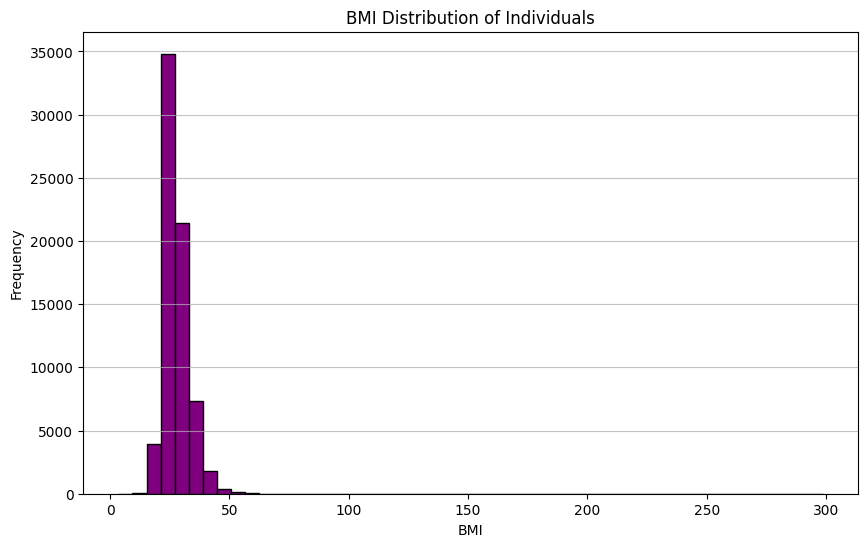

count    70000.000000
mean        27.556513
std          6.091511
min          3.471784
25%         23.875115
50%         26.374068
75%         30.222222
max        298.666667
Name: bmi, dtype: float64

In [11]:
# Calculate the BMI for each individual in the dataset

# BMI formula: weight (kg) / (height (m))^2
# Convert height from cm to m by dividing by 100

df['bmi'] = df['weight'] / ((df['height'] / 100) ** 2)

# Plot a histogram of the BMI values to inspect the distribution
plt.figure(figsize=(10, 6))
plt.hist(df['bmi'], bins=50, color='purple', edgecolor='black')
plt.title('BMI Distribution of Individuals')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

# Calculate descriptive statistics to further inspect the data
bmi_descriptive_stats = df['bmi'].describe()


bmi_descriptive_stats


- The majority of BMI values fall within a range that includes the normal, overweight, and obesity categories defined by the WHO.
- There's a wide range of BMI values, with a minimum around 3.47 and a maximum of approximately 298.67, indicating the presence of extreme outliers.
- The mean BMI is around 27.56, which falls into the overweight category, and the standard deviation is about 6.09.

Given these observations, and considering the WHO's BMI categories, a reasonable approach to filtering out unreasonable BMIs and outliers might include:

1. **Lower limit:** Setting a lower limit slightly below the underweight category to accommodate borderline cases. A BMI of less than 10 is exceptionally low and likely indicates data entry errors or extreme medical conditions.
2. **Upper limit:** Setting an upper limit that excludes the most extreme cases of obesity. While severe obesity (BMI ≥ 40) is valid, a BMI of greater than 50 could be considered unusually high for the general population and might also indicate data entry errors or specific cases that are not representative of the broader dataset.

Therefore, the range of **10 to 50** will be used. This range is broad enough to encompass most of the general population, including those who are underweight, of normal weight, overweight, and experiencing various degrees of obesity, while excluding extreme outliers that could ruin the analysis.

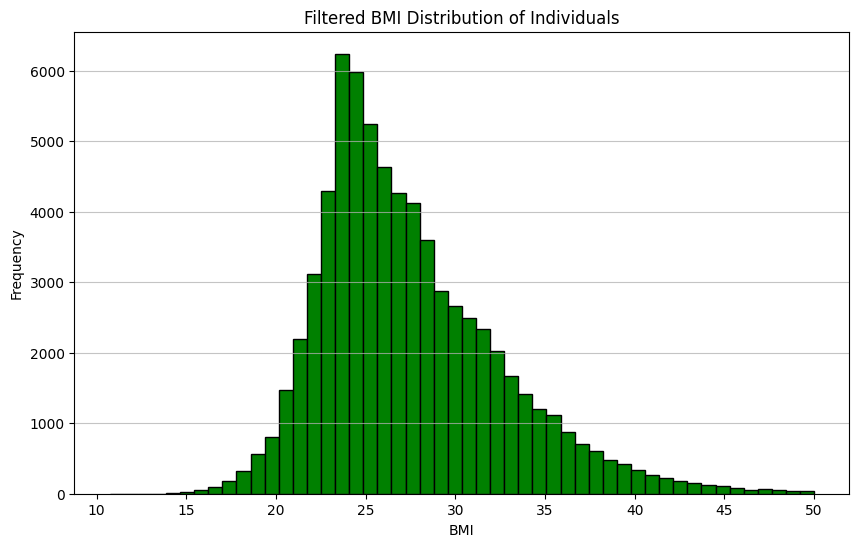

(99.64285714285714,
 count    69750.000000
 mean        27.412558
 std          5.063064
 min         10.726644
 25%         23.875115
 50%         26.346494
 75%         30.119376
 max         50.000000
 Name: bmi, dtype: float64)

In [12]:
# Apply the BMI limits to filter the dataset
filtered_df = df[(df['bmi'] >= 10) & (df['bmi'] <= 50)]

# Calculate the proportion of the original dataset retained after filtering
retained_proportion = len(filtered_df) / len(df) * 100

# Plot a histogram of the filtered BMI values to inspect the new distribution
plt.figure(figsize=(10, 6))
plt.hist(filtered_df['bmi'], bins=50, color='green', edgecolor='black')
plt.title('Filtered BMI Distribution of Individuals')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

# Return the proportion of data retained and descriptive statistics of the filtered BMI for validation
filtered_bmi_descriptive_stats = filtered_df['bmi'].describe()
retained_proportion, filtered_bmi_descriptive_stats


After filtering the dataset to exclude BMIs outside the range of 10 to 50, we have kept roughly 99.64% of the original data. This indicates that only a small fraction of the dataset was removed due to having extremely low or high BMI values, suggesting that most of the data falls within a reasonable range for BMI.

The histogram of the filtered BMI distribution shows a more concentrated range of values, aligning more closely with typical BMI categories.

- The mean new BMI is about 27.41, which is still within the overweight category but slightly lower than the original mean.
- The standard deviation has decreased to roughly 5.06, indicating a narrower spread of BMI values after filtering.
- The minimum and maximum BMI values are now 10.73 and 50.00, respectively, reflecting the applied filters.

### B) Create a categorical BMI feature with the categories: normal range, overweight, obese (class I), obese (class II), obese (class III).

In [13]:
# categorize BMI values
def categorize_bmi(bmi):
    if bmi < 18.5:
        return 'Underweight'
    elif 18.5 <= bmi <= 24.9:
        return 'Normal range'
    elif 25 <= bmi <= 29.9:
        return 'Overweight'
    elif 30 <= bmi <= 34.9:
        return 'Obese (class I)'
    elif 35 <= bmi <= 39.9:
        return 'Obese (class II)'
    else:
        return 'Obese (class III)'

df['bmi_category'] = df['bmi'].apply(categorize_bmi)

# Get the count for each BMI category
bmi_category_counts = df['bmi_category'].value_counts()

# Create a markdown table string
markdown_table = "| BMI Category | Count |\n|---------------|-------|\n"
for category, count in bmi_category_counts.items():
    markdown_table += f"| {category} | {count} |\n"

# Display the markdown table
display(Markdown(markdown_table))


| BMI Category | Count |
|---------------|-------|
| Overweight | 24877 |
| Normal range | 24748 |
| Obese (class I) | 12076 |
| Obese (class II) | 4350 |
| Obese (class III) | 3299 |
| Underweight | 650 |


BMI ranges defined by the World Health Organization (WHO)

- **Normal range:** BMI = 18.5–24.9
- **Overweight:** BMI = 25–29.9
- **Obese (class I):** BMI = 30–34.9
- **Obese (class II):** BMI = 35–39.9
- **Obese (class III):** BMI ≥ 40

Adding a new column to the dataset that categorizes each individual's BMI according to these ranges.

- **Normal range:** 24,748
- **Overweight:** 24,877
- **Obese (class I):** 12,076
- **Obese (class II):** 4,350
- **Obese (class III):** 3,055
- **Underweight:** 644

### 2.1.1 Feature engineering blood pressure

Discard samples with unreasonable blood pressures and outliers. Like problem 2.1.0, it is not trivial to set
the borders. Create a feature for blood pressure categories according to the table in this article. Describe how you arrive
up to the borders.

In [14]:
# Data cleaning based on the given thresholds
df = df[(df['ap_hi'] < 360) & (df['ap_hi'] > 30)]
df = df[(df['ap_lo'] < 350) & (df['ap_lo'] > 30)]

# Reset the index after cleaning
df.reset_index(drop=True, inplace=True)

# Create a new column for blood pressure category
df["Blood-pressure"] = ""

# Categorize blood pressure readings
for i in df.index:
    if df.at[i, "ap_hi"] < 120 and df.at[i, "ap_lo"] < 80:
        df.at[i, "Blood-pressure"] = "Healthy"
    elif df.at[i, "ap_hi"] < 130 and df.at[i, "ap_lo"] < 80:
        df.at[i, "Blood-pressure"] = "Elevated"
    elif df.at[i, "ap_hi"] < 140 or (df.at[i, "ap_lo"] >= 80 and df.at[i, "ap_lo"] < 90):
        df.at[i, "Blood-pressure"] = "Stage 1 hypertension"
    elif df.at[i, "ap_hi"] < 180 and df.at[i, "ap_lo"] < 120:
        df.at[i, "Blood-pressure"] = "Stage 2 hypertension"
    else:
        df.at[i, "Blood-pressure"] = "Hypertensive crisis"


### 2.2.0 - Visualizations share of diseases

Create barplots with a feature against the percentage of positives for cardiovascular disease. For example blood pressure categories
against proportion of positives, BMI category against proportion of positives etc. Make these plots into a figure with several subplots.

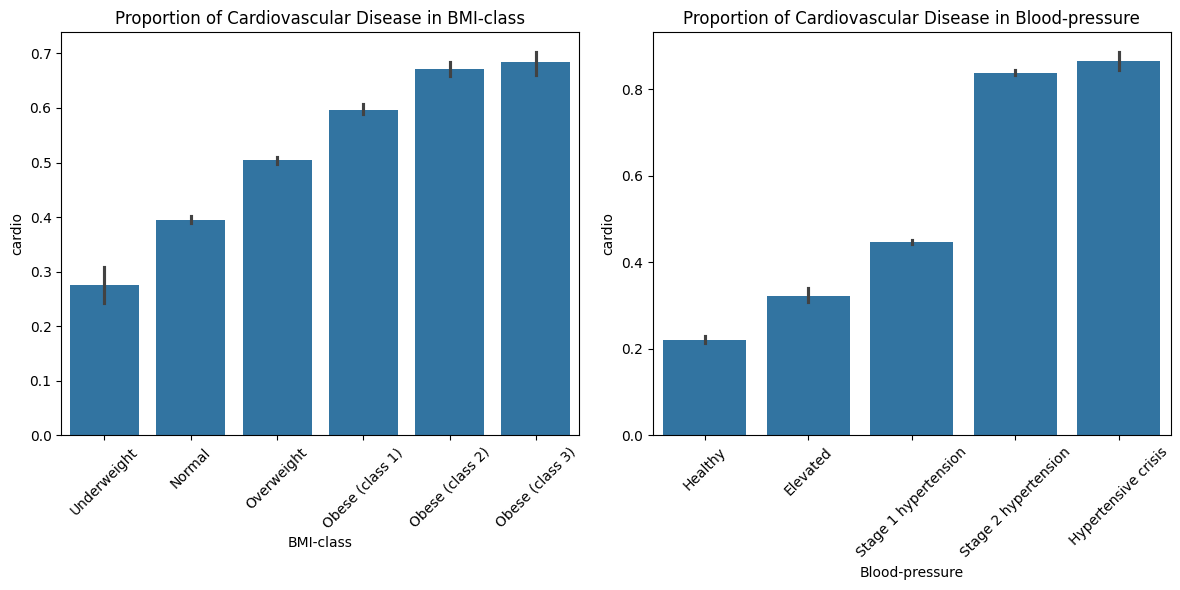

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df['bmi'] = df['weight'] / ((df['height'] / 100) ** 2)

# Define a function to categorize BMI
def categorize_bmi(bmi):
    if bmi < 18.5:
        return 'Underweight'
    elif bmi <= 24.9:
        return 'Normal'
    elif bmi <= 29.9:
        return 'Overweight'
    elif bmi <= 34.9:
        return 'Obese (class 1)'
    elif bmi <= 39.9:
        return 'Obese (class 2)'
    else:
        return 'Obese (class 3)'

df['BMI-class'] = df['bmi'].apply(categorize_bmi)

# Categorize blood pressure
def categorize_blood_pressure(ap_hi, ap_lo):
    if ap_hi < 120 and ap_lo < 80:
        return 'Healthy'
    elif ap_hi < 130 and ap_lo < 80:
        return 'Elevated'
    elif ap_hi < 140 or (ap_lo >= 80 and ap_lo < 90):
        return 'Stage 1 hypertension'
    elif ap_hi < 180 and ap_lo < 120:
        return 'Stage 2 hypertension'
    else:
        return 'Hypertensive crisis'

df['Blood-pressure'] = df.apply(lambda x: categorize_blood_pressure(x['ap_hi'], x['ap_lo']), axis=1)

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

df['BMI-class'] = pd.Categorical(df['BMI-class'], categories=[
    "Underweight", "Normal", "Overweight", "Obese (class 1)", "Obese (class 2)", "Obese (class 3)"
], ordered=True)

df['Blood-pressure'] = pd.Categorical(df['Blood-pressure'], categories=[
    "Healthy", "Elevated", "Stage 1 hypertension", "Stage 2 hypertension", "Hypertensive crisis"
], ordered=True)

# Create bar plots
columns = ['BMI-class', 'Blood-pressure']
for i, column in enumerate(columns):
    sns.barplot(x=column, y='cardio', data=df.sort_values(by=column), ax=axes[i])
    axes[i].set_title(f'Proportion of Cardiovascular Disease in {column}')
    axes[i].tick_params(axis='x', rotation=45)

fig.tight_layout()
plt.show()


### 2.2.1 - Visualizations correlation

Create a heatmap of correlations and see if you find features that are highly correlated, i.e. close to 1 or
features that are strongly negatively correlated, i.e. close to -1. Can you explain why they might be correlated?

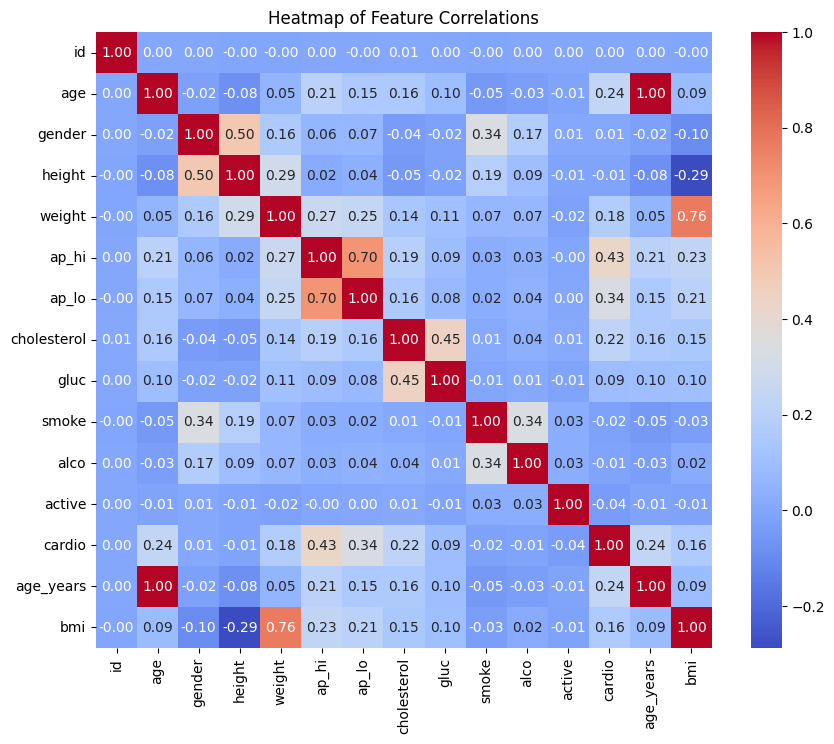

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns for the correlation matrix
numeric_df = df.select_dtypes(include=[np.number])

# Calculate the correlation matrix
corr = numeric_df.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Heatmap of Feature Correlations')
plt.show()


In [37]:
print(df.columns)


Index(['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio', 'age_years',
       'bmi', 'bmi_category', 'Blood-pressure', 'BMI-class'],
      dtype='object')


## 2.3 - Create two datasets

- Create a copy of your dataframe. 

On one data frame:

- remove the following features: ap_hi, ap_lo, height, weight, BMI
- do one-hot encoding on BMI category, blood pressure category and gender

On the second data frame:
- remove the following features: BMI category, blood pressure category, height, weight
- do one-hot encoding on the queue

In [38]:
import pandas as pd

df1 = df.copy()
df2 = df.copy()

# Remove specified features
df1.drop(['ap_hi', 'ap_lo', 'height', 'weight', 'bmi'], axis=1, inplace=True)
df2.drop(['BMI-class', 'Blood-pressure', 'height', 'weight'], axis=1, inplace=True)

# Perform one-hot encoding on the first DataFrame
df1 = pd.get_dummies(df1, columns=['BMI-class', 'Blood-pressure', 'gender'])


### 2.4 Choosing a model

In [39]:
print(df.columns)

Index(['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio', 'age_years',
       'bmi', 'bmi_category', 'Blood-pressure', 'BMI-class'],
      dtype='object')


## 2.4 Pick a model

In [40]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
import numpy as np

# Define models and hyperparameter grids
models = {
    "RandomForest": RandomForestClassifier(),
    "LogisticRegression": LogisticRegression(),
    "GradientBoosting": GradientBoostingClassifier()
}

param_grids = {
    "RandomForest": {"n_estimators": [100, 200], "max_depth": [5, 10]},
    "LogisticRegression": {"C": np.logspace(-4, 4, 20)},
    "GradientBoosting": {"n_estimators": [100, 200], "max_depth": [3, 5]}
}

# Function to evaluate models
def evaluate_models(df, models, param_grids):
    # Drop non-numeric columns
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    df = df[numeric_cols]

    X = df.drop('cardio', axis=1)
    y = df['cardio']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    for idx, (name, model) in enumerate(models.items()):
        print(f"Model {idx + 1} of {len(models)}: {name}")
        grid_search = GridSearchCV(model, param_grids[name], cv=5, scoring='accuracy')
        grid_search.fit(X_train_scaled, y_train)
        print(f"Model: {name}, Best Params: {grid_search.best_params_}")
        best_model = grid_search.best_estimator_
        predictions = best_model.predict(X_test_scaled)
        score = accuracy_score(y_test, predictions)
        print(f"Model: {name}, Accuracy: {score}")
        print("-" * 50)

print("Evaluating df1:")
evaluate_models(df1, models, param_grids)

print("\nEvaluating df2:")
evaluate_models(df2, models, param_grids)


Evaluating df1:
Model 1 of 3: RandomForest
Model: RandomForest, Best Params: {'max_depth': 10, 'n_estimators': 200}
Model: RandomForest, Accuracy: 0.6295892402762632
--------------------------------------------------
Model 2 of 3: LogisticRegression
Model: LogisticRegression, Best Params: {'C': 0.23357214690901212}
Model: LogisticRegression, Accuracy: 0.6284260268993094
--------------------------------------------------
Model 3 of 3: GradientBoosting
Model: GradientBoosting, Best Params: {'max_depth': 3, 'n_estimators': 200}
Model: GradientBoosting, Accuracy: 0.6290076335877862
--------------------------------------------------

Evaluating df2:
Model 1 of 3: RandomForest
Model: RandomForest, Best Params: {'max_depth': 10, 'n_estimators': 200}
Model: RandomForest, Accuracy: 0.7378407851690294
--------------------------------------------------
Model 2 of 3: LogisticRegression
Model: LogisticRegression, Best Params: {'C': 0.012742749857031334}
Model: LogisticRegression, Accuracy: 0.728171

### 2.5 Ensemble

Använd ```VotingClassifier()``` på datasetet som du valt och lägg in de bästa parametrarna för respektive
modell.

In [51]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import VotingClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression

# one-hot encoding
df_encoded = pd.get_dummies(df, columns=['bmi_category', 'Blood-pressure', 'gender'], drop_first=True)

# Isolate numeric columns for scaling
numeric_cols = df_encoded.select_dtypes(include=['int64', 'float64']).columns

# Exclude the target variable 'cardio' from X
X = df_encoded[numeric_cols].drop(['cardio'], axis=1)
y = df['cardio']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling the numeric features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Instantiate the models with their best parameters found in previous steps
rf = RandomForestClassifier(n_estimators=200, max_depth=10)
lr = LogisticRegression(C=0.012742749857031334, max_iter=1000)
gb = GradientBoostingClassifier(n_estimators=200, max_depth=3)

# Create the Voting Classifier with soft voting
voting_clf = VotingClassifier(estimators=[('rf', rf), ('lr', lr), ('gb', gb)], voting='soft')

# Fit the ensemble model
voting_clf.fit(X_train_scaled, y_train)

# Evaluate the ensemble model's accuracy on the test set
accuracy = voting_clf.score(X_test_scaled, y_test)
print(f"Ensemble model accuracy: {accuracy}")


Ensemble model accuracy: 0.7381315885132679


### 2.6 Evaluations

Make confusion matrices and classification reports for 2.4 and 2.5

In [57]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming best_model is your best-performing model from task 2.4
# and voting_clf is your ensemble model from task 2.5
# Also assuming X_test_scaled is your scaled test features

# Generate predictions for task 2.4
predictions_24 = best_model.predict(X_test_scaled)

# Generate predictions for task 2.5
predictions_25 = voting_clf.predict(X_test_scaled)


# Assuming predictions_24 and predictions_25 are your predictions from the best model in 2.4 and the ensemble model in 2.5 respectively
# And y_test is your true target values for the test set

# Generate confusion matrix and classification report for 2.4
cm_24 = confusion_matrix(y_test, predictions_24)
report_24 = classification_report(y_test, predictions_24)

# Generate confusion matrix and classification report for 2.5
cm_25 = confusion_matrix(y_test, predictions_25)
report_25 = classification_report(y_test, predictions_25)

# Plotting confusion matrix for 2.4
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
sns.heatmap(cm_24, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix for 2.4')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

# Plotting confusion matrix for 2.5
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
sns.heatmap(cm_25, annot=True, fmt="d", cmap="Greens")
plt.title('Confusion Matrix for 2.5')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.tight_layout()
plt.show()

# Printing classification reports
print("Classification Report for 2.4:\n", report_24)
print("Classification Report for 2.5:\n", report_25)


NameError: name 'best_model' is not defined

#### 2.4 evaluation

#### 2.5 evaluation

In [ ]:
# Make predictions using the VotingClassifier
predictions_ensemble = voting_classifier.predict(X_test_scaled)

# Calculate confusion matrix for the ensemble model
conf_matrix_ensemble = confusion_matrix(y_test, predictions_ensemble)
print("Confusion Matrix for section 2.5:")
print(conf_matrix_ensemble)

# Generate classification report for the ensemble model
class_report_ensemble = classification_report(y_test, predictions_ensemble)
print("Classification Report for section 2.5:")
print(class_report_ensemble)

### 2.7 "Deploy" - save model

Start by picking 100 randomly selected rows from your dataset. Export these 100 samples in
test_samples.csv. Then you take the best model and train on all the data we have except the 100
the data points you picked out. Then save the model to a .pkl file using joblib.dump(). For
model, you may need to use the compress argument to compress if the file size is too large

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.externals import joblib

# Load your dataset
df = pd.read_csv("cardio_train.csv")

# Step 1: Select 100 random samples and export to CSV
test_samples = df.sample(n=100, random_state=42)
test_samples.to_csv("test_samples.csv", index=False)

# Remove the selected samples from the dataset
df = df.drop(test_samples.index)

# Split the dataset into features and target variable
X = df.drop('target_column_name', axis=1)  # Adjust the target column name accordingly
y = df['target_column_name']

# Step 2: Train your best model using all the data except the 100 samples
best_model = RandomForestClassifier()  # Example, replace with your best model
best_model.fit(X, y)

# Step 3: Save the trained model to a .pkl file
joblib.dump(best_model, "trained_model.pkl", compress=True)


### 2.8 Load the model

Create a new script: production_model.py, load test_samples.csv and your model. Used
joblib.load() to load a .pkl file. Make predictions on the 100 data points and export a file
"prediction.csv" which should contain the columns with filled values:

- probability class 0
- probability class 1
- prediction

In [ ]:
import pandas as pd
from sklearn.externals import joblib

# Load test samples
test_samples = pd.read_csv("test_samples.csv")

# Load trained model
model = joblib.load("trained_model.pkl")

# Extract features from test samples
X_test = test_samples.drop(columns=['target_column_name'])  # Adjust the target column name accordingly

# Make predictions
predictions = model.predict(X_test)
probabilities = model.predict_proba(X_test)

# Create DataFrame with predictions
prediction_df = pd.DataFrame({
    'probability_class_0': probabilities[:, 0],
    'probability_class_1': probabilities[:, 1],
    'prediction': predictions
})

# Export predictions to CSV
prediction_df.to_csv("prediction.csv", index=False)
